## Generate random Hamming distance matrices (one for each week of the year) and build a histogram. Also generate random 'variants' (labelled 1 and 2) to give distribution split by 'variant', as in figure S3.

<Axes: ylabel='Density'>

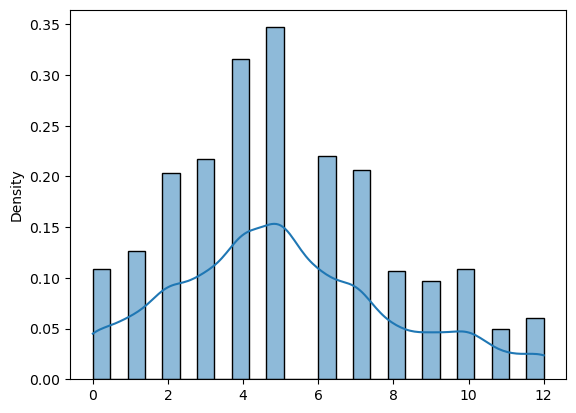

In [81]:
import numpy as np
import seaborn as sns 

# Random distribution of hamming distances over days - hamming distances will be drawn from this distribution
p = np.array((0.05, 0.05, 0.1, 0.1, 0.15, 0.15, 0.1, 0.1, 0.05, 0.05, 0.05, 0.025, 0.025, 0))

size = 100

# Generate sample of size = 100 pairs, with distribtuion p and with maximum hamming distance hmax = 14
def generate_hamming_mat(size = size, seed = 100, p = p, hmax = 14):
    np.random.seed(seed)
    hamming = np.zeros((size, size)).astype(int)
    for i in range(size):
        hamming[(i+1):, i] = np.random.choice(np.arange(0, hmax), size = size - i - 1, p = p)
    return hamming

randh = generate_hamming_mat()

vec = randh[np.tril_indices(size, k = -1)]
sns.histplot(vec, stat = 'density', kde = True)

Generate a random Hamming matrix for each week of the year. Assign variant labels randomly.


In [82]:
import pandas as pd
nweeks = 53

# Variant labels and distribution
variants = [1, 2]
var_distribution = np.array((0.3, 0.7))
# 53 Hamming distance matrices
hammings = [generate_hamming_mat(seed = i) for i in range(nweeks)]
# Ids
ids = ['id_' + str(i) for i in range(size)]
# Create a dataframe of hamming matrices and of variants assigned to each ID
hamming_dfs = [pd.DataFrame(h, columns = ids, index = ids) for h in hammings]
variant_dfs = [pd.DataFrame(np.vstack((ids, np.random.choice(variants, p = var_distribution, size = size))).T, columns = ['id', 'variant']) for i in range(nweeks)]

100%|██████████| 4/4 [00:00<00:00, 20.10it/s]


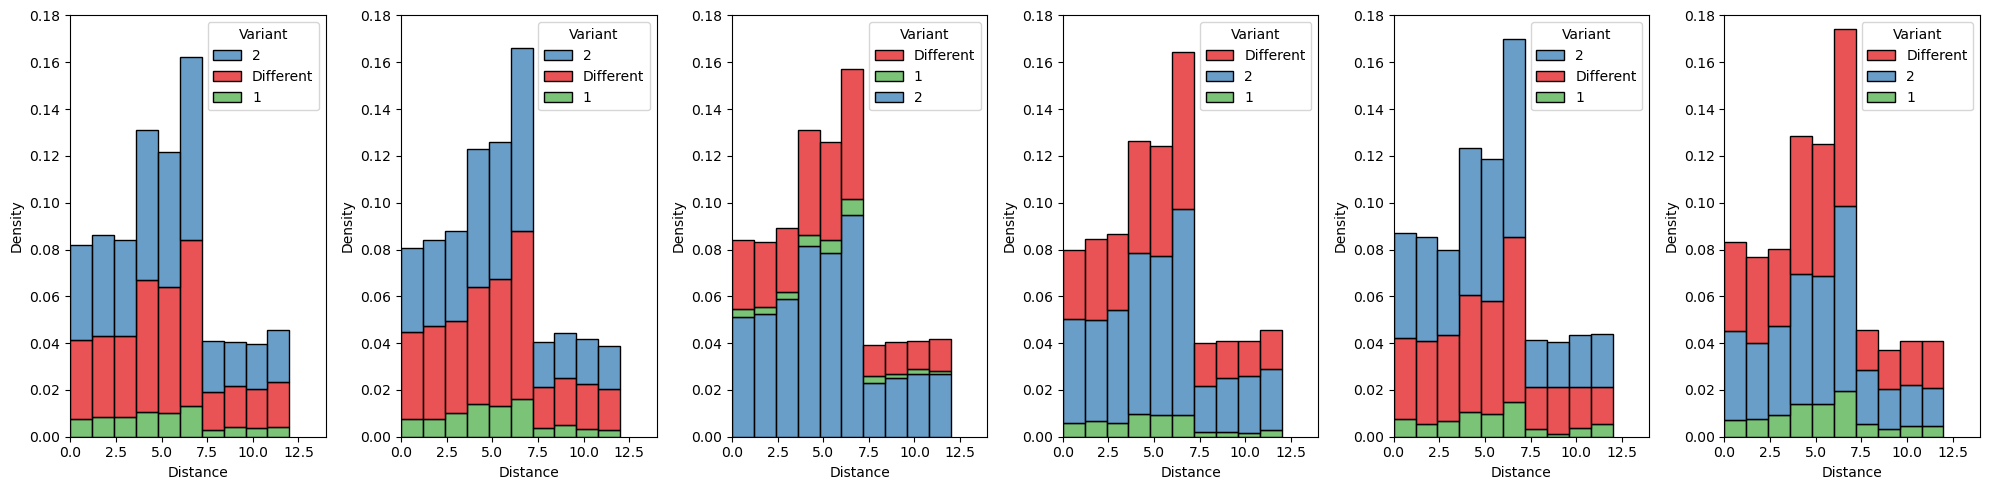

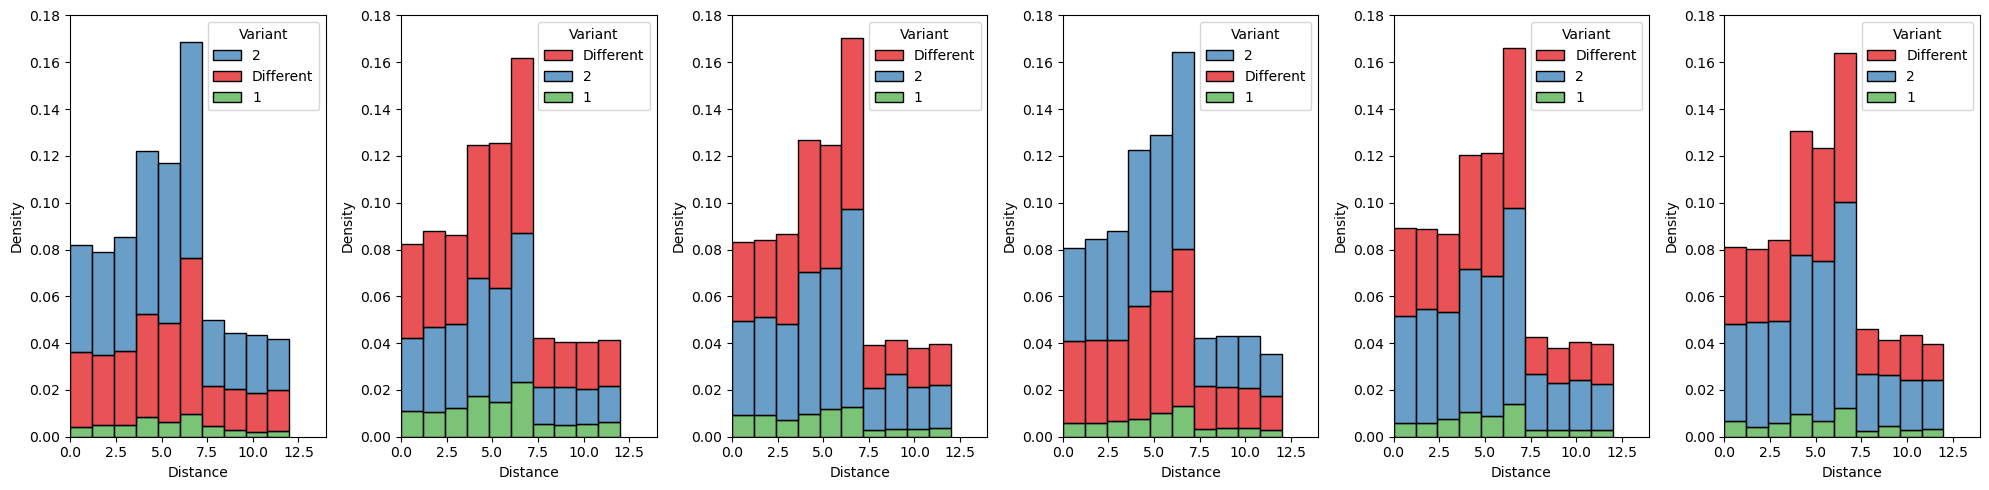

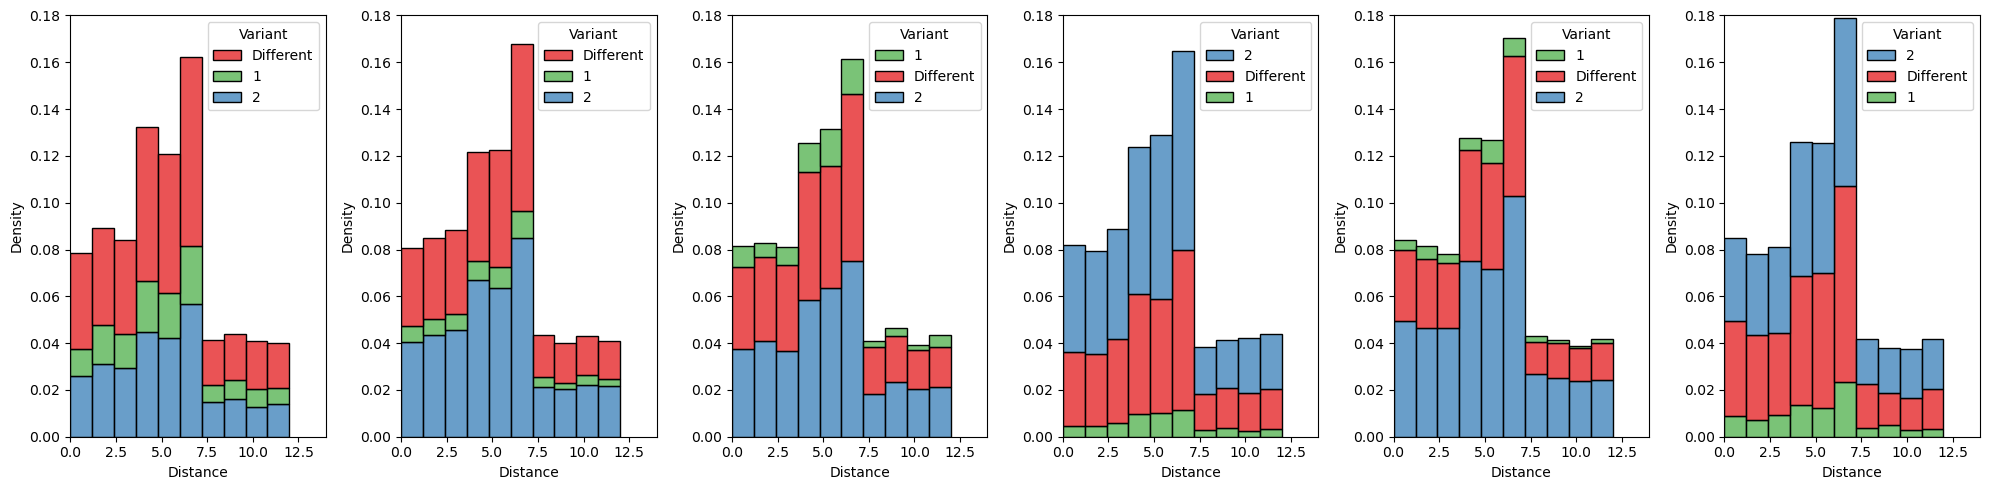

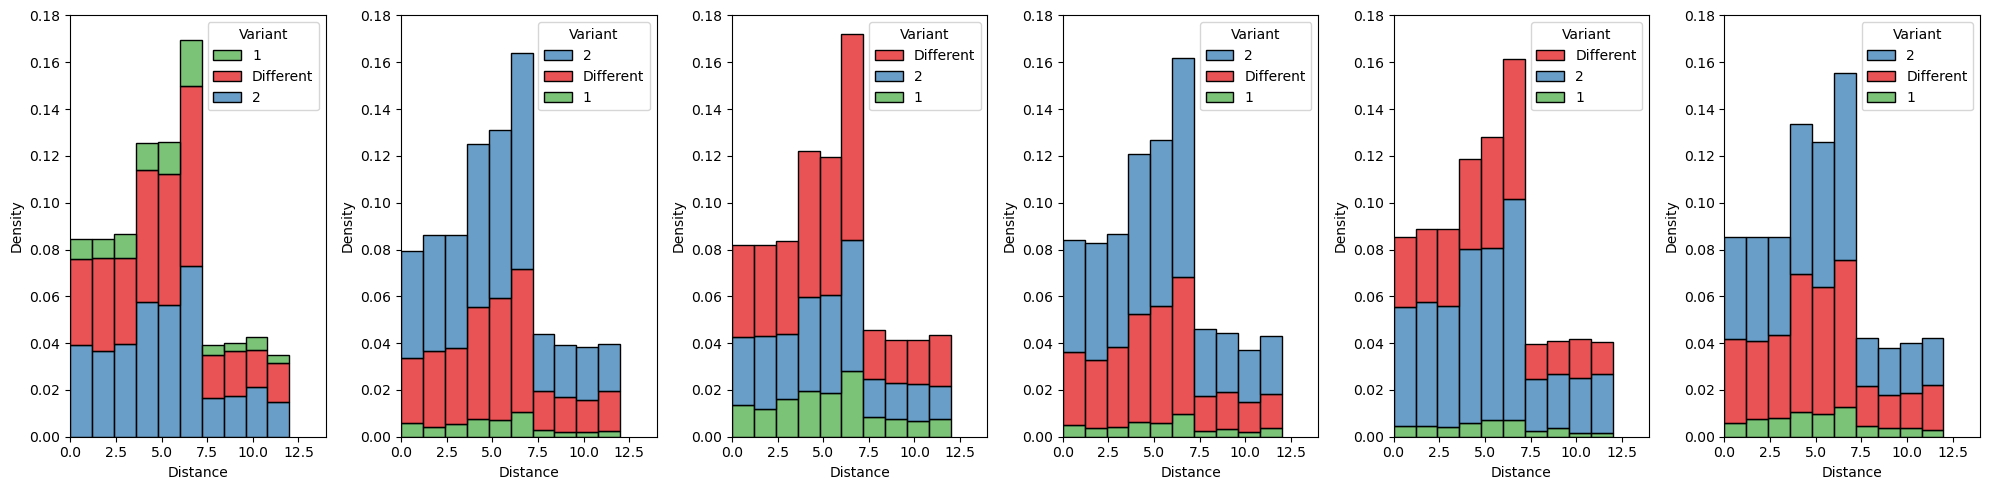

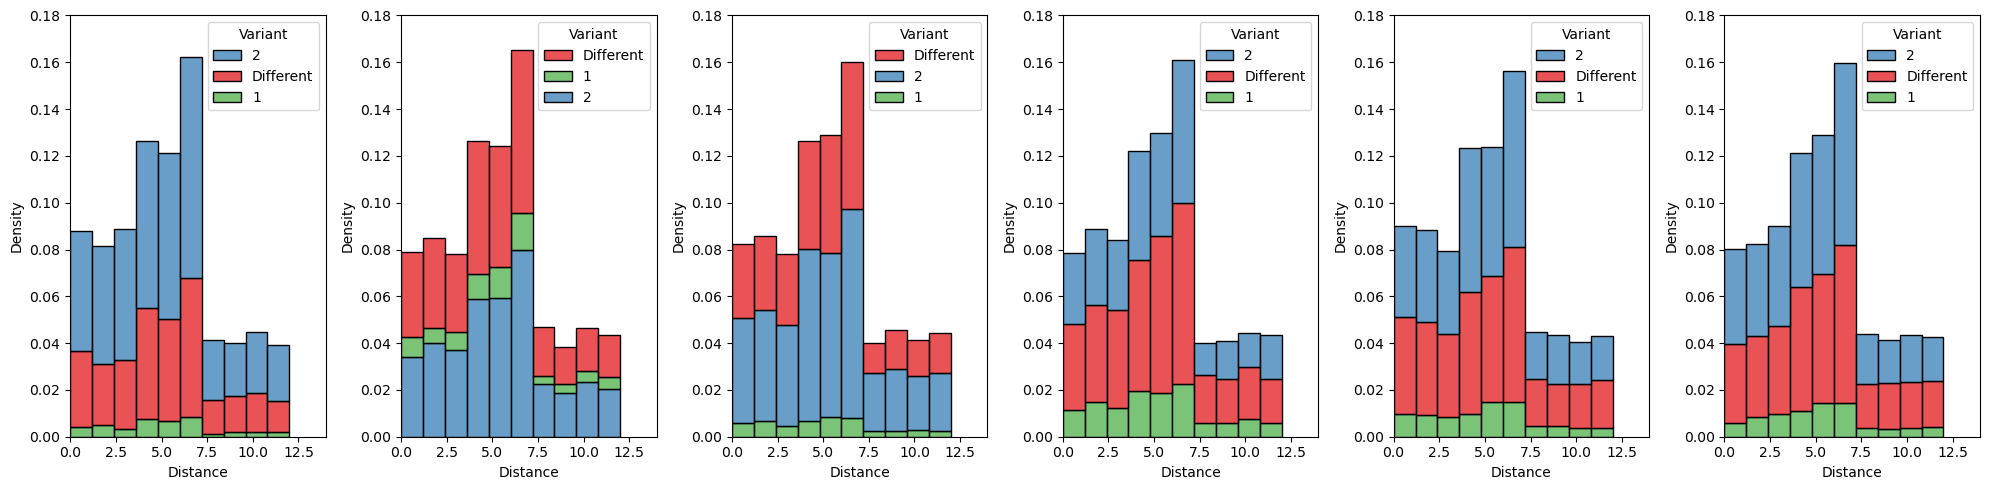

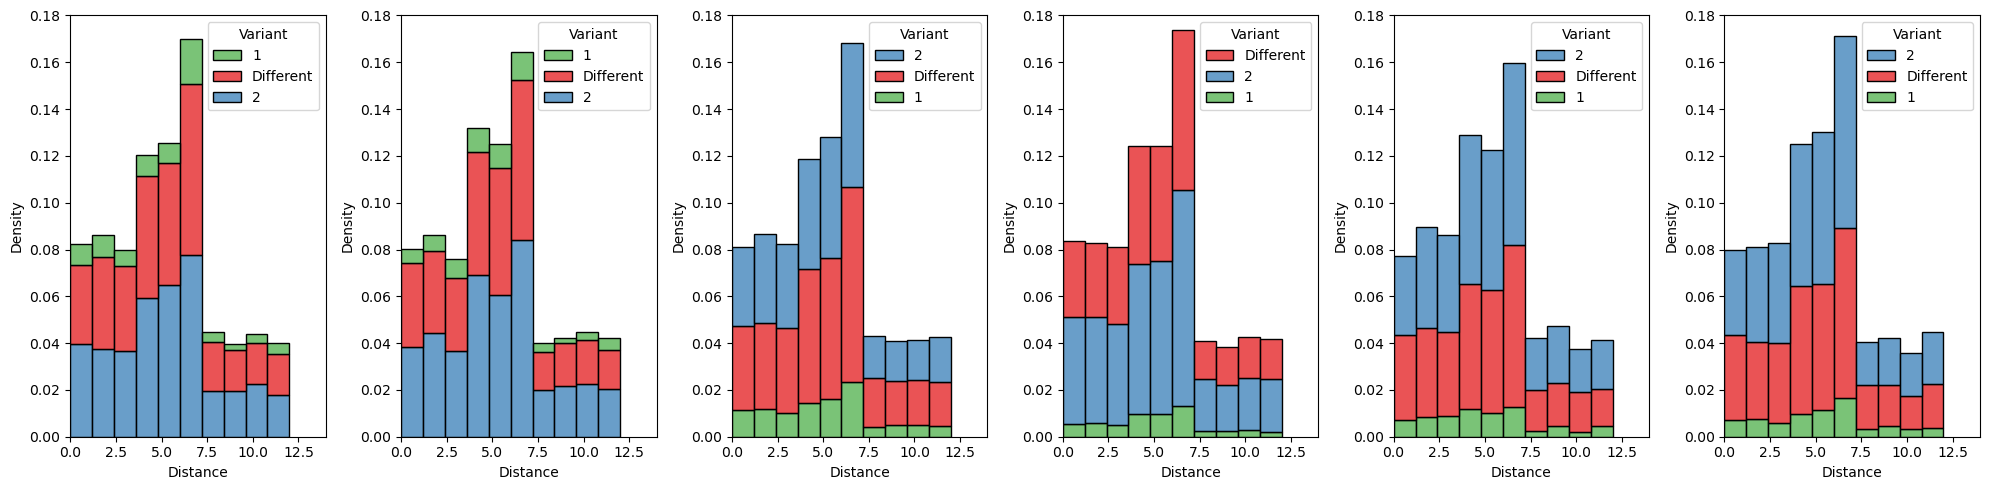

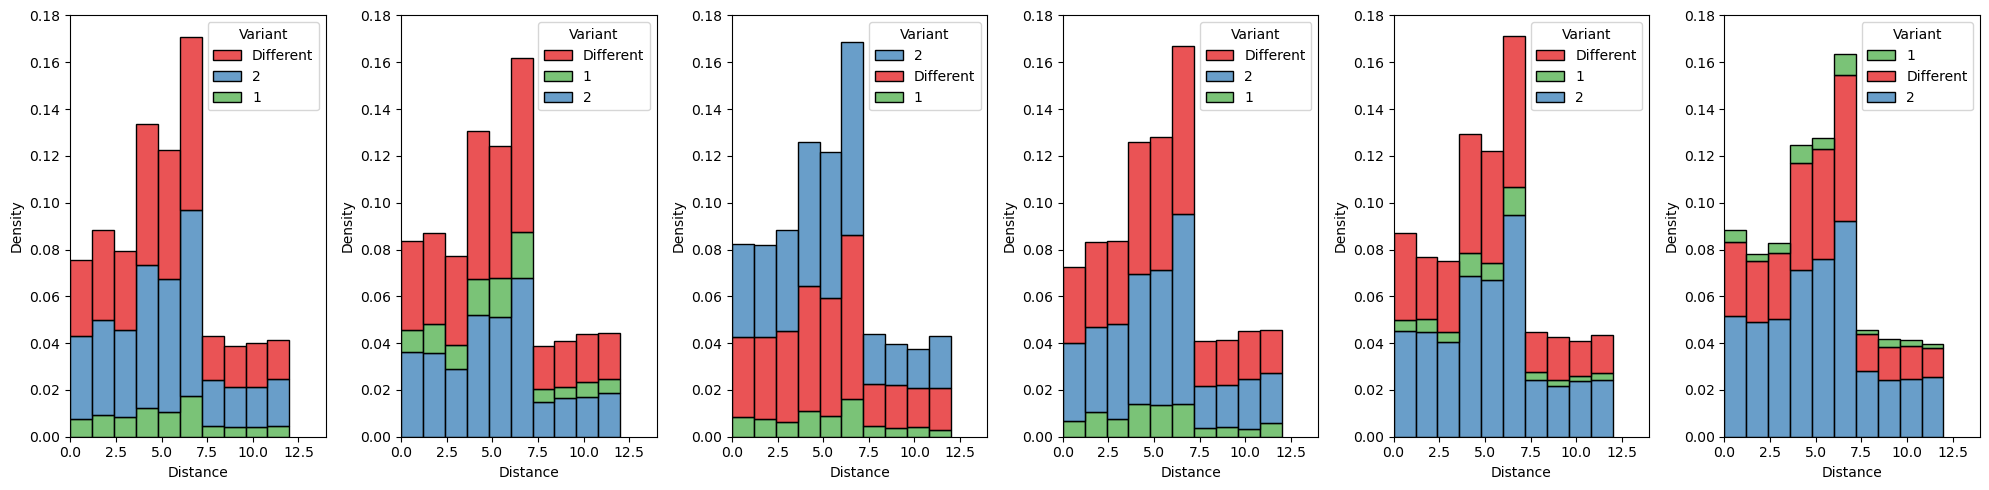

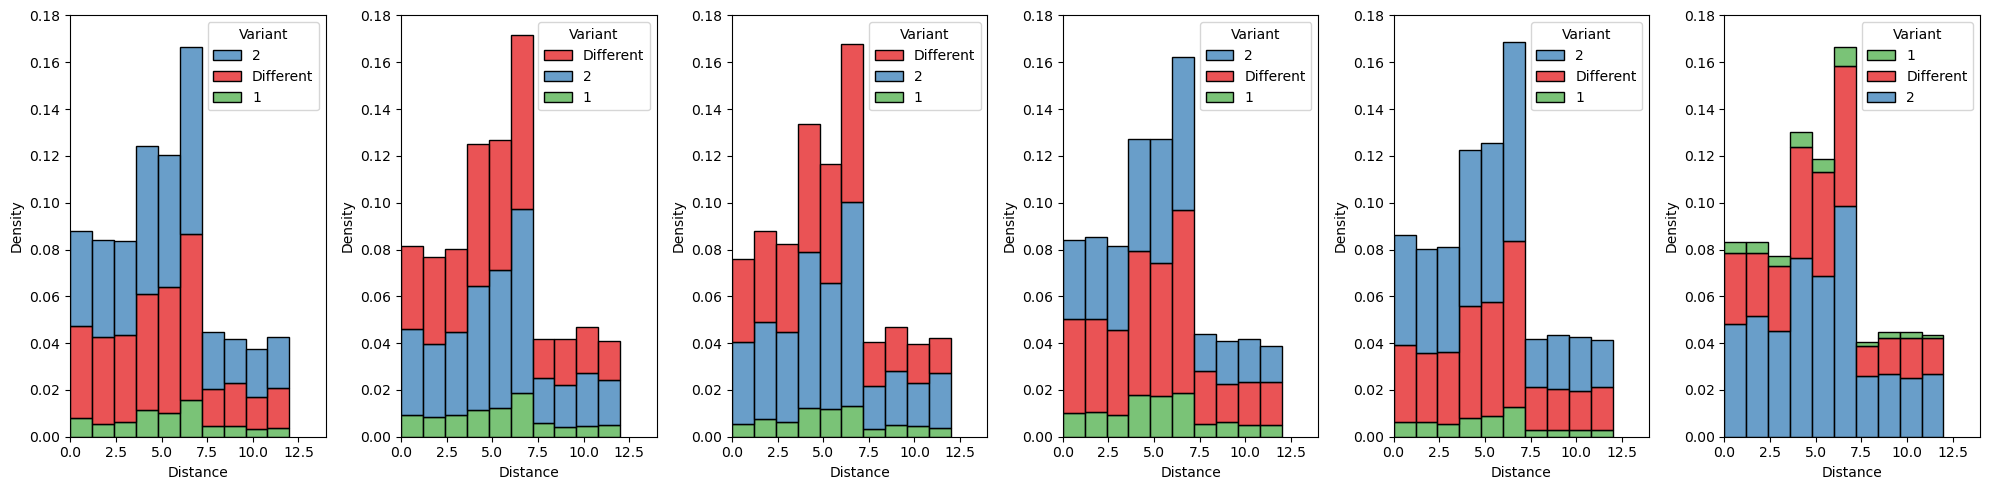

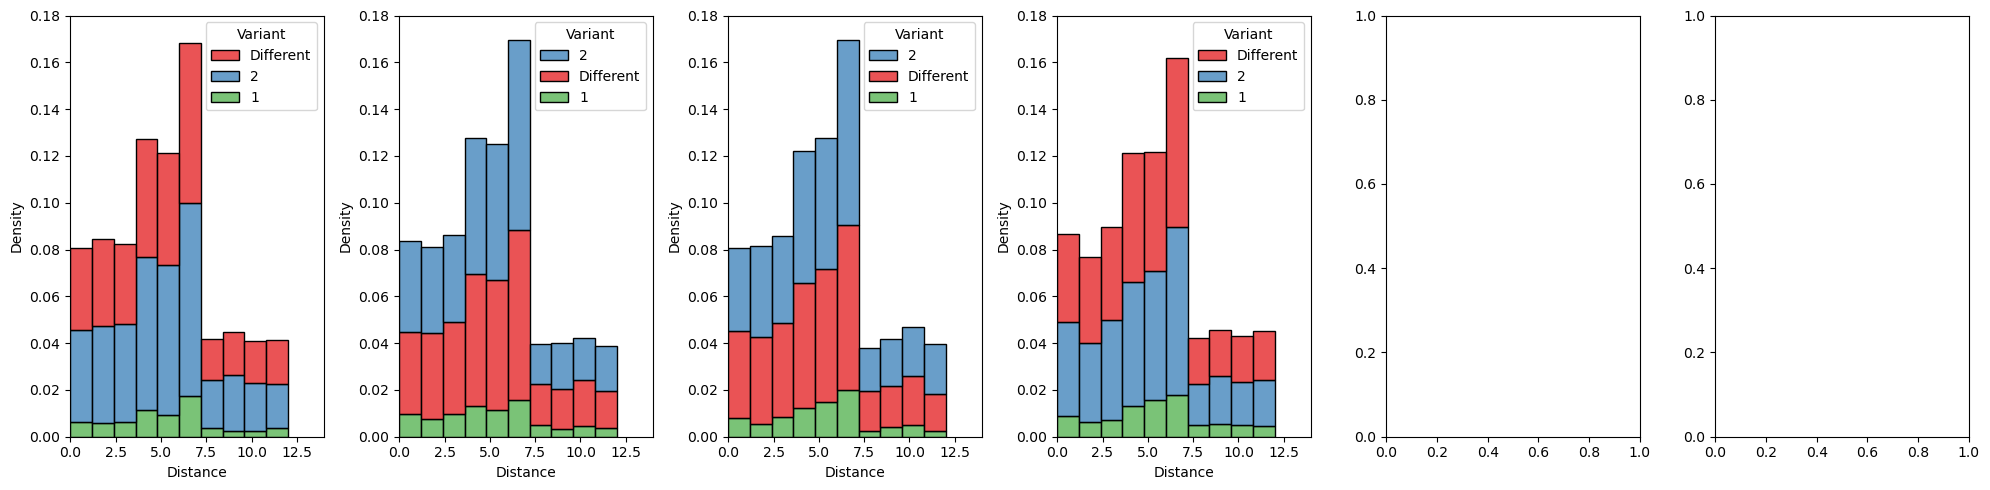

In [88]:
from time import time
from matplotlib import pyplot as plt
from tqdm import tqdm

cmap = sns.color_palette('Set1')
palette = {'1': cmap[2], '2': cmap[1], 'Different': cmap[0]}

# Build a histogram for each week of the year
ranges = [[0, 6], [6, 12], [12, 18], [18, 24], [24, 30], [30, 36], [36, 42], [42, 48], [48, 52]]

for ra, rang in enumerate(ranges):
    start = time()

    figs, axs = plt.subplots(1, 6, figsize = (20, 5))

    for w in tqdm(range(rang[0], rang[1])):
        df = variant_dfs[w]
        hamming = hamming_dfs[w]
        match_df = df.copy()
        equal_variants = hamming.copy()
        # match_df.join(df, how = 'inner', on = 'id')
        for i, idx in enumerate(ids):
            v = str(match_df.loc[match_df['id'] == idx].variant.values[0])
            
            equal = (np.array((match_df['variant'].values) == v).astype(int))
            variant_comparison = np.zeros(len(equal)).astype(str)
            variant_comparison[equal == 0] = 'Different'
            variant_comparison[equal == 1] = str(v)
            
            
            equal_variants.iloc[:, i] = variant_comparison

        unique_hamming_distances = hamming.values[np.tril_indices(100, k = -1)]
        unique_equal_variants = equal_variants.values[np.tril_indices(100, k = -1)]
        df_dict = pd.DataFrame({'Distance' : unique_hamming_distances, 'Variant' : unique_equal_variants})
        sns.histplot(df_dict, ax = axs[w%6], x = 'Distance', bins = 10, stat = 'density', hue = 'Variant', multiple = 'stack', palette=palette)
        axs[w%6].set_xlim([0, 14])
        axs[w%6].set_ylim([0, 0.18])
        
    figs.tight_layout()